# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [37]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [39]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from matplotlib.colors import ListedColormap

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

* Не имеет смысла применять монотонные функции от одного признака, так как решения в вершинах дерева не изменятся, а следовательно и результат работы.
* Немонотонные функции для одного вещественного признака не подходят, так как они могут не сохранять отношения порядка, что важно при построении обучающего дерева.
* Линейные функции использовать также не имеет смысла по той же причине, что и монотонные функции от одного признака, поскольку условия сравнения в вершинах накладываются только на значения одного и того же признака (и только потом результаты для разных признаков используются).
* Нелинейные функции теоретически могут быть полезны, но не в нашем случае, когда мы ищем простейшие зависимости.
* Стандартизация признаков может производиться, но является опциональной, поскольку не повлияет на результат работы дерева, только (возможно) на время работы.
* Преобразование категориальных признаков обязательно, если мы хотим их учитывать при работе с деревом, поскольку работа возможна только  с вещественными. 

---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

In [40]:
day_df = pd.read_csv('day.csv', parse_dates=[0])

Удаляем признаки, которые мы отметили как бесполезные в прошлом задании:

In [41]:
todrop = ['instant', 'dteday', 'yr', 'casual', 'registered', 'atemp', 'season']
day_df.drop(inplace=True, columns=todrop, axis=1)
day_df

,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...
726,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [42]:
train, test = train_test_split(day_df, test_size=0.4)
valid, test = train_test_split(test, test_size=0.5)

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [43]:
categorial_features = ['mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'hum', 'windspeed']
target_feature = 'cnt'

Удаляем выбросы для каждого значения категориальных признаков (по вещественным) используя принцип построения boxplot:

In [44]:
train['holiday'] = train['holiday'].apply(lambda x: x + 1)
train['weekday'] = train['weekday'].apply(lambda x: x + 1)
train['workingday'] = train['workingday'].apply(lambda x: x + 1)

for hue in categorial_features:  # режем данные для удаления выбросов по вещественным осям train
    for real_hue in (real_features  + [target_feature]):
        low_q = train[[hue] + [real_hue]].groupby(hue).quantile(0.25)
        high_q = train[[hue] + [real_hue]].groupby(hue).quantile(0.75)
        dif = 1.5 * (high_q - low_q)
        low_q -= dif
        high_q += dif
        train['high_q'] = train[hue].apply(lambda x: high_q[real_hue].iloc[int(x) - 1])
        train['low_q'] = train[hue].apply(lambda x: low_q[real_hue].iloc[int(x) - 1])
        train = train[(train['low_q'] < train[real_hue]) & (train['high_q'] > train[real_hue])]
        train = train.drop(columns=['high_q', 'low_q'])

In [45]:
valid['holiday'] = valid['holiday'].apply(lambda x: x + 1)
valid['weekday'] = valid['weekday'].apply(lambda x: x + 1)
valid['workingday'] = valid['workingday'].apply(lambda x: x + 1)

for hue in categorial_features:  # режем данные для удаления выбросов по вещественным осям valid
    for real_hue in (real_features):
        low_q = valid[[hue] + [real_hue]].groupby(hue).quantile(0.25)
        high_q = valid[[hue] + [real_hue]].groupby(hue).quantile(0.75)
        dif = 1.5 * (high_q - low_q)
        low_q -= dif
        high_q += dif
        valid['high_q'] = valid[hue].apply(lambda x: high_q[real_hue].iloc[int(x) - 1])
        valid['low_q'] = valid[hue].apply(lambda x: low_q[real_hue].iloc[int(x) - 1])
        valid = valid[(valid['low_q'] < valid[real_hue]) & (valid['high_q'] > valid[real_hue])]
        valid = valid.drop(columns=['high_q', 'low_q'])

In [46]:
test['holiday'] = test['holiday'].apply(lambda x: x + 1)
test['weekday'] = test['weekday'].apply(lambda x: x + 1)
test['workingday'] = test['workingday'].apply(lambda x: x + 1)

for hue in categorial_features:  # режем данные для удаления выбросов по вещественным осям test
    for real_hue in (real_features):
        low_q = test[[hue] + [real_hue]].groupby(hue).quantile(0.25)
        high_q = test[[hue] + [real_hue]].groupby(hue).quantile(0.75)
        dif = 1.5 * (high_q - low_q)
        low_q -= dif
        high_q += dif
        test['high_q'] = test[hue].apply(lambda x: high_q[real_hue].iloc[int(x) - 1])
        test['low_q'] = test[hue].apply(lambda x: low_q[real_hue].iloc[int(x) - 1])
        test = test[(test['low_q'] < test[real_hue]) & (test['high_q'] > test[real_hue])]
        test = test.drop(columns=['high_q', 'low_q'])

Кодируем категориальные признаки:

In [47]:
encoder = OneHotEncoder(drop=None, sparse_output=False)
encoder.fit(train[categorial_features])
encoder.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([1, 2]),
 array([1, 2, 3, 4, 5, 6, 7]),
 array([1, 2]),
 array([1, 2, 3])]

In [48]:
train_cat = encoder.transform(train[categorial_features])
X_train = np.hstack([train[real_features], train_cat])
Y_train = train[target_feature]

valid_cat = encoder.transform(valid[categorial_features])
X_valid = np.hstack([valid[real_features], valid_cat])
Y_valid = valid[target_feature]

test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_cat])
Y_test = test[target_feature]

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

In [49]:
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:
predictions = clf.predict(X_valid)
metrics.mean_absolute_percentage_error(predictions, Y_valid)

0.3760070783613227

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [51]:
errors = list()

for i in np.arange(30):
    clf = DecisionTreeClassifier(random_state=42, max_depth=i + 1)
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_valid)
    errors.append(metrics.mean_absolute_percentage_error(predictions, Y_valid))

Text(0.5, 1.0, 'Зависимость ошибки предсказаний от максимальной глубины дерева')

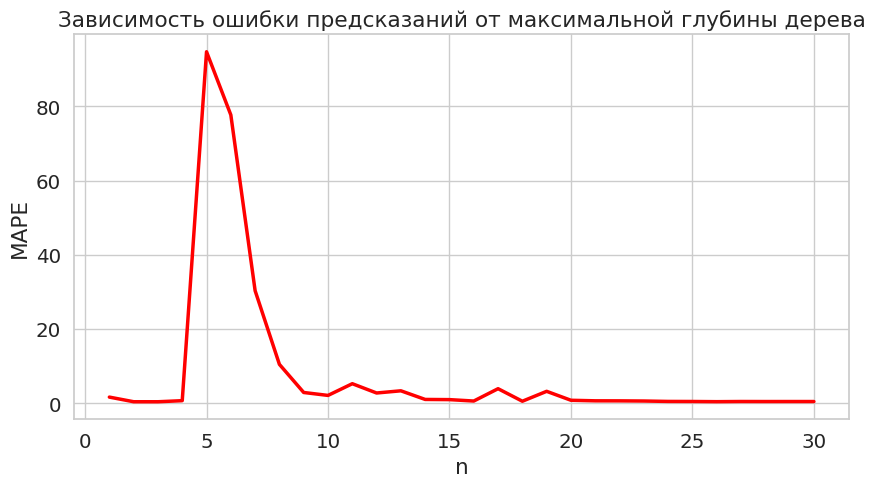

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(30) + 1, errors, lw=2.5, color='red')
plt.ylabel('MAPE')
plt.xlabel('n')
plt.title('Зависимость ошибки предсказаний от максимальной глубины дерева')

Как можно заметить, ошибка достигает своего минимума и перестает изменяться примерно при значении максимальной глубины равном 27.

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

In [53]:
errors2 = list()

for i in np.arange(200):
    clf = DecisionTreeClassifier(random_state=42, max_depth=27, min_samples_leaf=i + 1)
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_valid)
    errors2.append(metrics.mean_absolute_percentage_error(predictions, Y_valid))

Text(0.5, 1.0, 'Зависимость ошибки предсказаний от минимального числа объектов в листе')

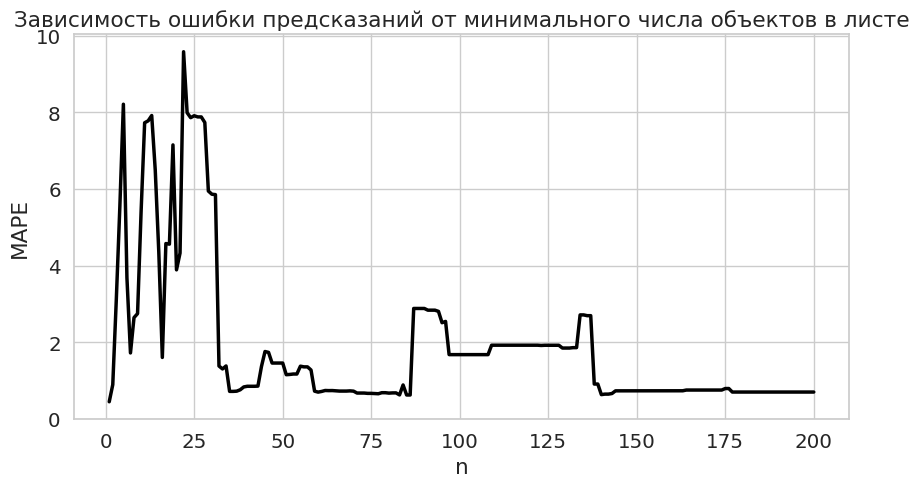

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(200) + 1, errors2, lw=2.5, color='black')
plt.ylabel('MAPE')
plt.xlabel('n')
plt.title('Зависимость ошибки предсказаний от минимального числа объектов в листе')

По графику сложно сказать, какое значение является минимальным, поскольку он плохо аппроксимируется простейшими
зависимостями. Тем не менее мы возьмем число 50 как величину, после которой наблюдются стабильно низкие значения
MAPE.

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

In [55]:
def get_graphviz_graph(decision_tree_regressor):
    decision_tree_regressor.fit(X_train, Y_train)
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None, 
        feature_names=real_features + list(encoder.get_feature_names_out()), class_names='cnt',  
        filled=True, rounded=True, special_characters=True
    )
    return graphviz.Source(dot_data)  

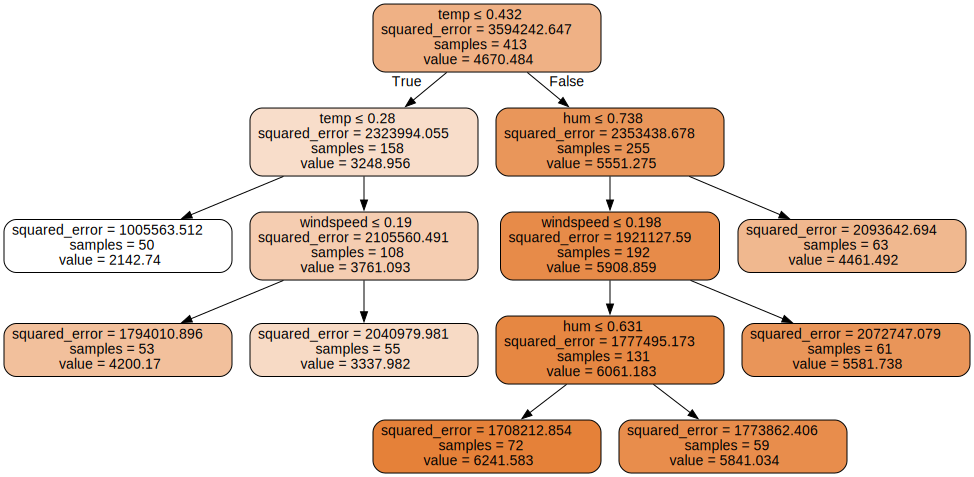

In [56]:
clf = DecisionTreeRegressor(max_depth=27, min_samples_leaf=50)
graph = get_graphviz_graph(clf)
graph

In [57]:
prediction = clf.predict(X_test)

In [58]:
MAPE = metrics.mean_absolute_percentage_error(prediction, Y_test)
MAPE

0.2660692686022996

Как мы видим точность получилась сопоставимая с методом линейной регрессии из прошлого задания.

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

In [59]:
importance = pd.DataFrame(clf.feature_importances_.reshape(1, X_train.shape[1]))
cols = dict(zip(importance.columns, real_features + list(encoder.get_feature_names_out())))
importance = importance.rename(cols, axis='columns')
importance

,temp,hum,windspeed,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,workingday_1,workingday_2,weathersit_1,weathersit_2,weathersit_3
0,0.818843,0.141159,0.039998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Так как мы видим, что категориальные признаки имеют 0 важность в нашем дереве, можем оставить для barplot только вещественные.

In [60]:
importance = importance[real_features]

Text(0.5, 1.0, 'Важность признаков')

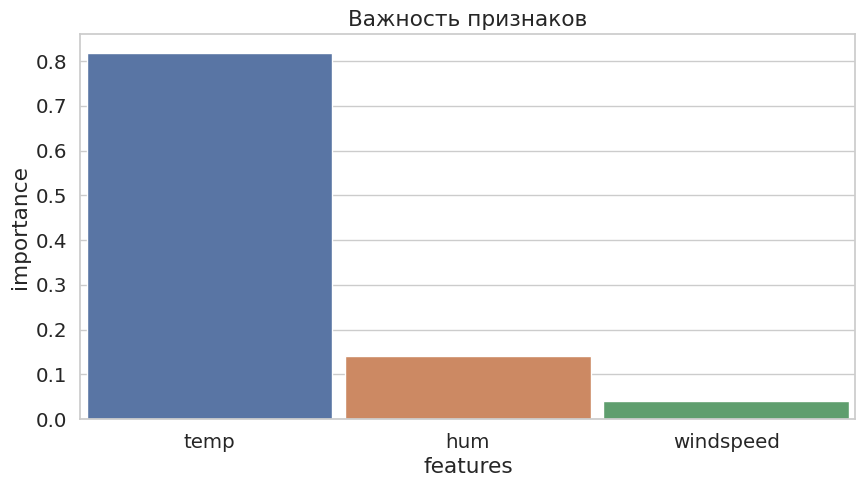

In [61]:
plt.figure(figsize=(10, 5))
sns.barplot(importance, width=0.95, palette='deep')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Важность признаков')

Мы нашли оптимальные гиперпараметры для разрешающего дерева, построили его и посчитали предсказание с его ошибкой.
Ошибка MAPE чуть меньше $30\%$ является неплохим результатом для такого простого метода, но точность можно еще повысить создавая большее количество деревьев. Также мы получили что наибольшее (с большим отрывом) влияние на 
количество людей, взявших велосипед напрокат, оказывает температура воздуха.

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [62]:
n_estimators = 500
model = RandomForestRegressor(n_estimators=n_estimators)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

In [63]:
predict_mean = np.zeros(Y_valid.shape[0])
valid_predict_mape = list()

for i in range(n_estimators):
    predict_mean = (predict_mean * i + model.estimators_[i].predict(X_valid)) / (i + 1)
    valid_predict_mape.append(metrics.mean_absolute_percentage_error(predict_mean, Y_valid))

In [64]:
predict_mean = np.zeros(Y_train.shape[0])
train_predict_mape = list()

for i in range(n_estimators):
    predict_mean = (predict_mean * i + model.estimators_[i].predict(X_train)) / (i + 1)
    train_predict_mape.append(metrics.mean_absolute_percentage_error(predict_mean, Y_train))

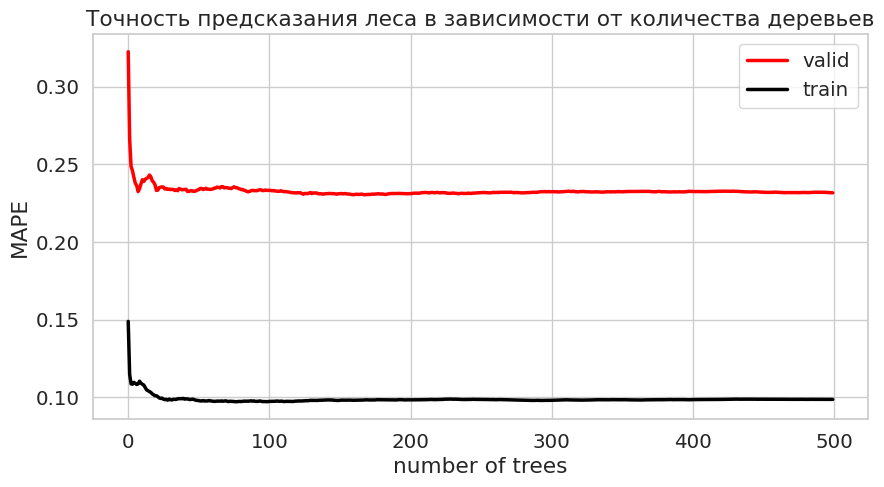

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(500), valid_predict_mape, lw=2.5, label='valid', color='red')
plt.plot(np.arange(500), train_predict_mape, lw=2.5, label='train', color='black')
plt.xlabel('number of trees')
plt.ylabel('MAPE')
plt.title('Точность предсказания леса в зависимости от количества деревьев')
plt.legend()

По графику сразу видно, что увеличение количества деревьев повышает точность предсказания при малом их количестве, также после 100 деревьев ошибка почти не изменяется. Более явно прослеживается эффект переобучения, потому как на тренировочных данных ошибка значительно меньше чем на валидационных.

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

In [66]:
importance = pd.DataFrame(model.feature_importances_.reshape(1, X_train.shape[1])).rename(cols, axis='columns')
importance


,temp,hum,windspeed,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,workingday_1,workingday_2,weathersit_1,weathersit_2,weathersit_3
0,0.533997,0.17032,0.113939,0.002787,0.002495,0.00765,0.00706,0.003557,0.004745,0.002643,...,0.005809,0.005861,0.008427,0.008082,0.009233,0.006058,0.005781,0.022278,0.005206,0.008026


In [67]:
importance = importance.T
importance = importance[importance[0] > 0.01].T
importance

,temp,hum,windspeed,mnth_9,mnth_11,weathersit_1
0,0.533997,0.17032,0.113939,0.014004,0.018888,0.022278


Text(0.5, 1.0, 'Важность признаков')

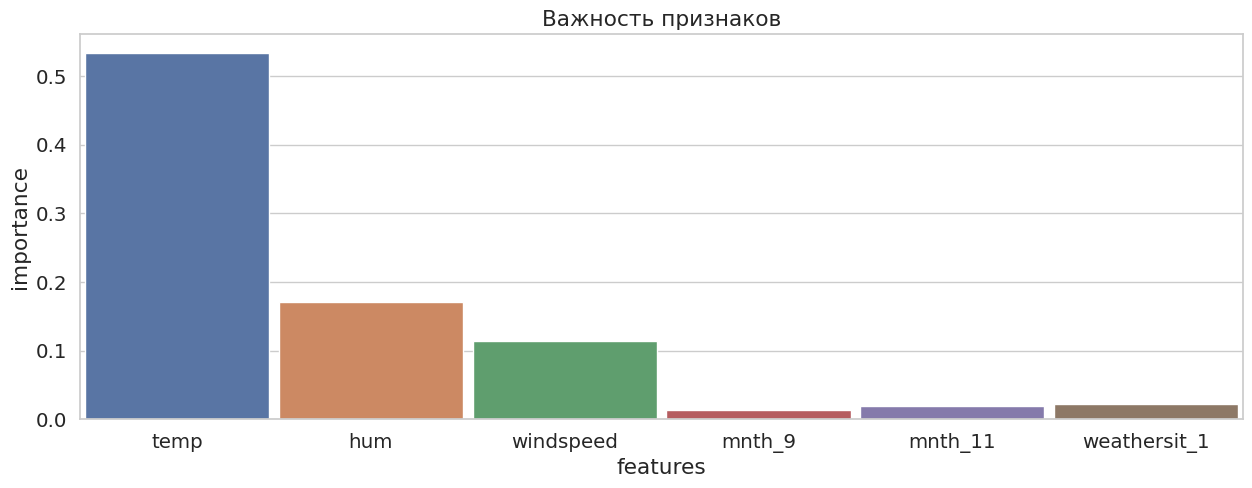

In [68]:
plt.figure(figsize=(15, 5))
sns.barplot(importance, width=0.95, palette='deep')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Важность признаков')

При большом количестве деревьев важность остальных признаков несколько повысилась, но температура воздуха по прежнему превалирует.

In [69]:
prediction = model.predict(X_test)
prediction

array([6482.78 , 5989.904, 2378.9  , 3907.45 , 3332.594, 2390.226,
       4283.01 , 3564.644, 1837.432, 4033.092, 3686.942, 4613.102,
       4452.964, 5261.276, 5836.598, 3722.204, 4249.324, 1924.364,
       5254.446, 4304.312, 3326.278, 1945.886, 6645.064, 1664.336,
       5640.58 , 2798.844, 2879.844, 6252.848, 4873.424, 6250.164,
       3296.984, 4037.142, 4493.976, 5512.226, 5741.614, 5836.536,
       3252.512, 6350.68 , 6607.61 , 4260.014, 4367.912, 6498.47 ,
       6859.364, 6037.598, 2750.34 , 4758.482, 5177.93 , 1810.624,
       2837.874, 1880.816, 5273.898, 5151.844, 6936.48 , 2986.46 ,
       5855.914, 4957.356, 1743.692, 6187.702, 5606.998, 5446.246,
       5694.562, 4060.89 , 4390.556, 4281.072, 2828.344, 6814.18 ,
       5608.774, 6160.26 , 2650.532, 5720.158, 5621.374, 3503.104,
       5284.402, 5658.784, 5954.174, 6453.714, 4611.934, 2600.482,
       3178.332, 6759.56 , 5123.536, 5912.208, 3365.682, 5360.98 ,
       7150.522, 2144.242, 5505.608, 2729.586, 7096.324, 5387.

In [70]:
MAPE = metrics.mean_absolute_percentage_error(prediction, Y_test)
MAPE

0.2360151500451355

Точность предсказания повысилась по сравнению с одним деревом, но незначительно. При этом для дальнейшего увеличения точности надо использовать иные методы, поскольку при последующем добавлении деревьев ошибка почти не уменьшалась.
Также было выявлено что категориальные признаки тоже оказывают некоторое влияние на предсказание, хоть и много меньшее чем вещественные и, в частности, температура.